In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing
from sklearn.model_selection import GridSearchCV


In [5]:
import pandas as pd

# Lee el archivo CSV
df = pd.read_csv("Baseplcascruzadas.csv",  sep=';', encoding='utf-8')

# Muestra las primeras filas del DataFrame para verificar la carga exitosa
print(df.head())

<ipython-input-5-8007825b6d61>:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Baseplcascruzadas.csv",  sep=';', encoding='utf-8')


    Placa departamento   ciudad    servicio   SoloFecha  SoloHora  DiaSemana  \
0  LES692     AMAZONAS  LETICIA  PARTICULAR  12/07/2023  12:19:00  miércoles   
1  LEK215     AMAZONAS  LETICIA  PARTICULAR  28/07/2023  16:25:00    viernes   
2  LES980     AMAZONAS  LETICIA  PARTICULAR  29/07/2023   9:28:00     sábado   
3  LET070     AMAZONAS  LETICIA  PARTICULAR   2/08/2023  16:47:00  miércoles   
4  LEN346     AMAZONAS  LETICIA  PARTICULAR   4/08/2023  10:58:00    viernes   

         FECHA_HORA  Unnamed: 8  Unnamed: 9  Unnamed: 10 Unnamed: 11  
0  12/07/2023 12:19         NaN         NaN          NaN         NaN  
1  28/07/2023 16:25         NaN         NaN          NaN         NaN  
2   29/07/2023 9:28         NaN         NaN          NaN         NaN  
3   2/08/2023 16:47         NaN         NaN          NaN         NaN  
4   4/08/2023 10:58         NaN         NaN          NaN         NaN  


In [6]:
df

,Placa,departamento,ciudad,servicio,SoloFecha,SoloHora,DiaSemana,FECHA_HORA,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,LES692,AMAZONAS,LETICIA,PARTICULAR,12/07/2023,12:19:00,miércoles,12/07/2023 12:19,NaN,NaN,NaN,NaN
1,LEK215,AMAZONAS,LETICIA,PARTICULAR,28/07/2023,16:25:00,viernes,28/07/2023 16:25,NaN,NaN,NaN,NaN
2,LES980,AMAZONAS,LETICIA,PARTICULAR,29/07/2023,9:28:00,sábado,29/07/2023 9:28,NaN,NaN,NaN,NaN
3,LET070,AMAZONAS,LETICIA,PARTICULAR,2/08/2023,16:47:00,miércoles,2/08/2023 16:47,NaN,NaN,NaN,NaN
4,LEN346,AMAZONAS,LETICIA,PARTICULAR,4/08/2023,10:58:00,viernes,4/08/2023 10:58,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
578882,PBZ000,VICHADA,PUERTO CARRE,PARTICULAR,24/11/2023,16:05:00,viernes,24/11/2023 16:05,NaN,NaN,NaN,NaN
578883,PCA119,VICHADA,PUERTO CARRE,PARTICULAR,7/12/2023,22:15:00,jueves,7/12/2023 22:15,NaN,NaN,NaN,NaN
578884,PBX867,VICHADA,PUERTO CARRE,PARTICULAR,13/12/2023,13:40:00,miércoles,13/12/2023 13:40,NaN,NaN,NaN,NaN
578885,PBX088,VICHADA,PUERTO CARRE,PARTICULAR,14/12/2023,12:35:00,jueves,14/12/2023 12:35,NaN,NaN,NaN,NaN


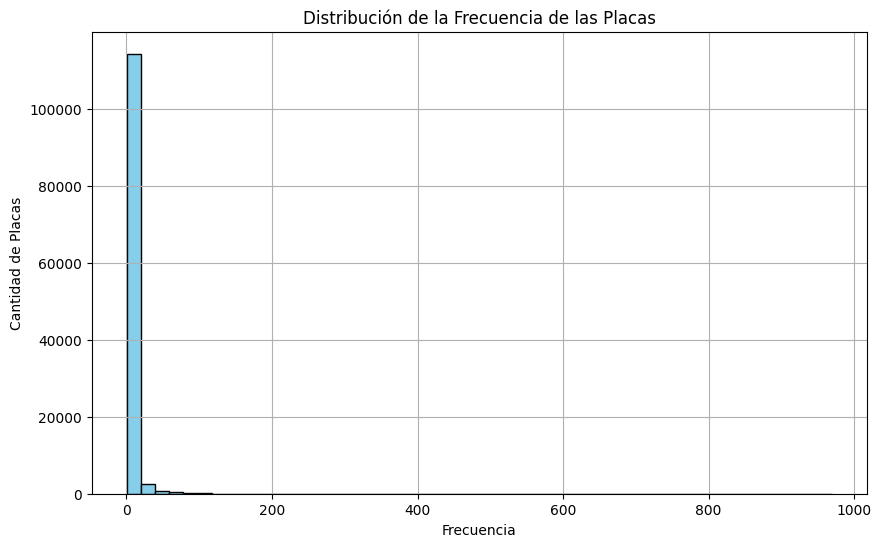

Cantidad total de placas únicas: 118713


In [7]:
# Calcular la cantidad total de placas únicas
total_placas = df['Placa'].nunique()

# Calcular la frecuencia de cada placa
frecuencia_placas = df['Placa'].value_counts()

# Visualizar la distribución de la frecuencia de las placas
plt.figure(figsize=(10, 6))
frecuencia_placas.plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de la Frecuencia de las Placas')
plt.xlabel('Frecuencia')
plt.ylabel('Cantidad de Placas')
plt.grid(True)
plt.show()

# Mostrar la cantidad total de placas únicas
print("Cantidad total de placas únicas:", total_placas)

In [8]:
# Calcular la frecuencia de cada placa
frecuencia_placas = df['Placa'].value_counts()

# Mostrar la tabla de frecuencia de las placas
tabla_frecuencia = pd.DataFrame({'Placa': frecuencia_placas.index, 'Frecuencia': frecuencia_placas.values})
print(tabla_frecuencia)

         Placa  Frecuencia
0       XJA803         969
1       XJB317         961
2       XID734         881
3       WLS961         873
4       XIE326         769
...        ...         ...
118708  GKW827           1
118709  CQN630           1
118710  SQK387           1
118711  FYK803           1
118712  PBX761           1

[118713 rows x 2 columns]


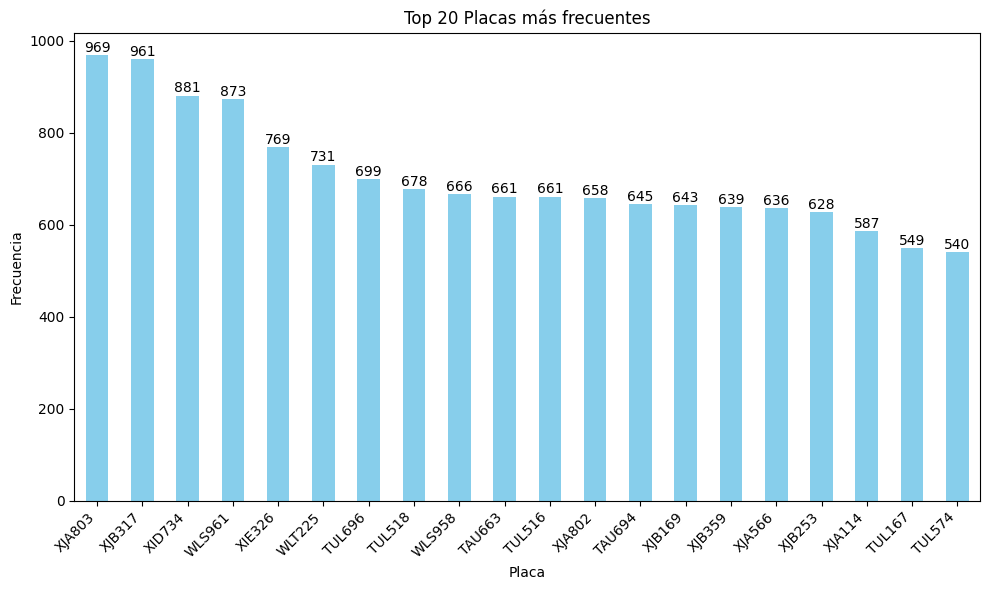

In [9]:
top_20_placas = df['Placa'].value_counts().head(20)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_20_placas.plot(kind='bar', color='skyblue')

# Agregar etiquetas con la cantidad de veces que aparece cada placa
for i, count in enumerate(top_20_placas):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.title('Top 20 Placas más frecuentes')
plt.xlabel('Placa')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-10-0b1978456ad2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_placas.index, y=top_20_placas.values, palette="viridis")


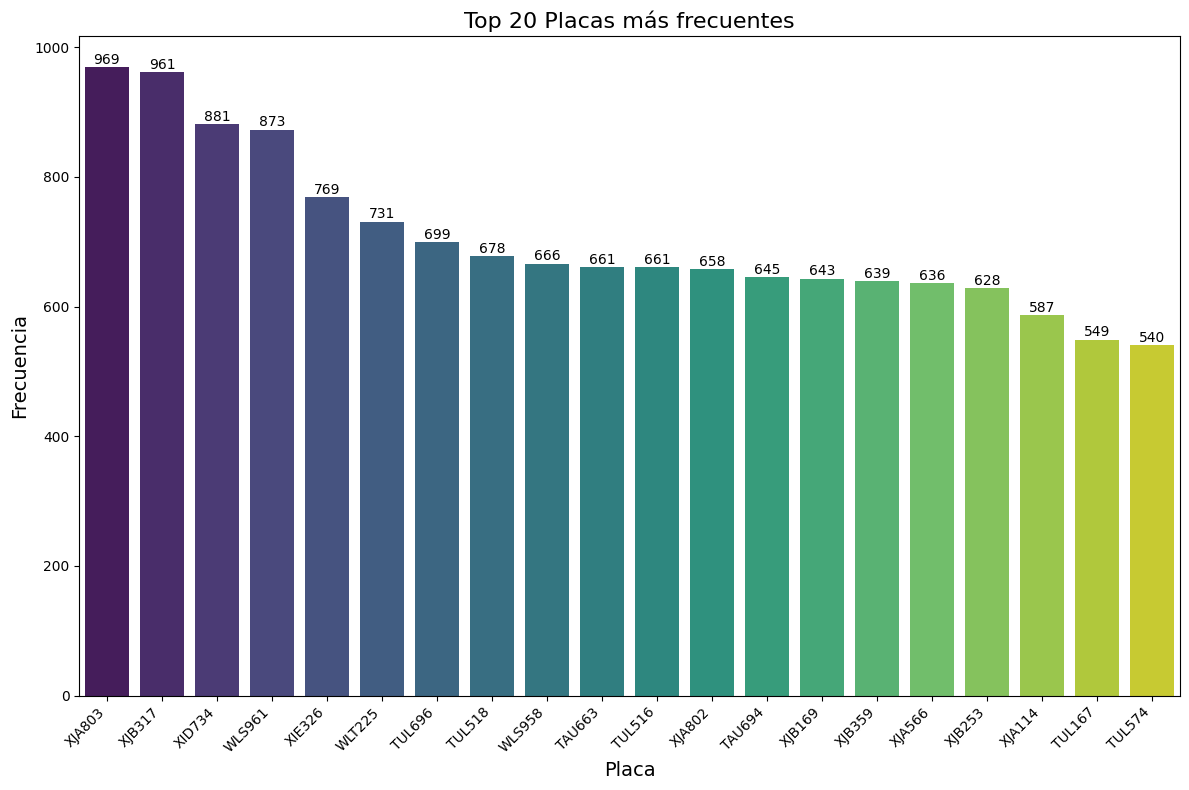

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Obtener las top 20 placas más frecuentes
top_20_placas = df['Placa'].value_counts().head(20)

# Crear el gráfico de barras utilizando seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_placas.index, y=top_20_placas.values, palette="viridis")

# Agregar etiquetas con la cantidad de veces que aparece cada placa
for i, count in enumerate(top_20_placas):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Top 20 Placas más frecuentes', fontsize=16)
plt.xlabel('Placa', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

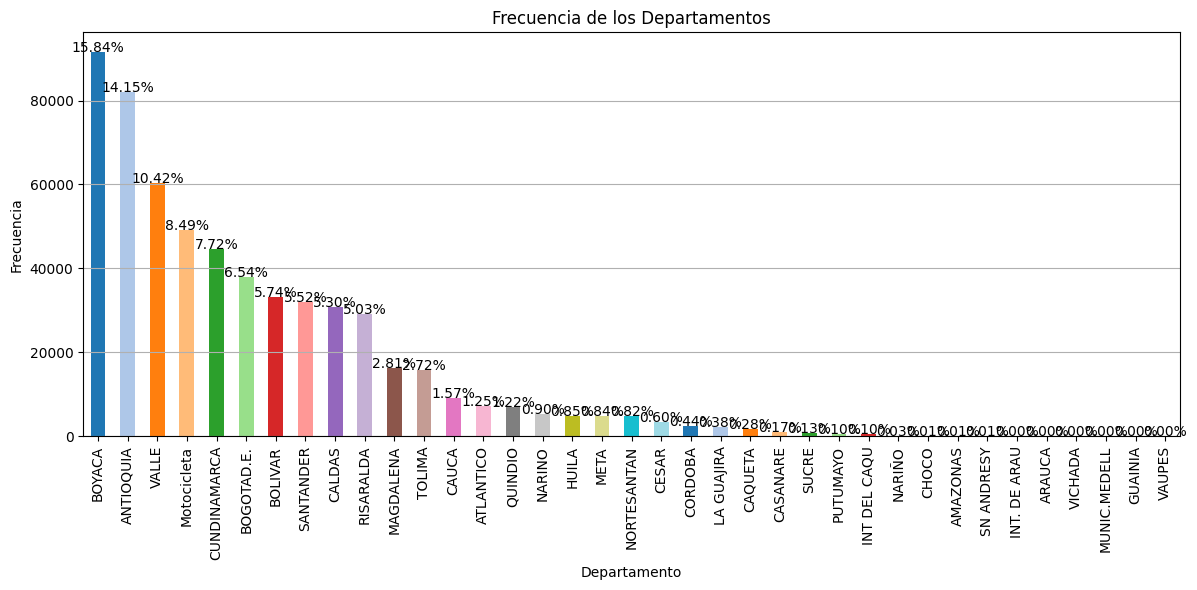

Cantidad total de departamentos únicos: 37

Estadísticas descriptivas de la frecuencia de los departamentos:
count       37.000000
mean     15645.594595
std      23735.341355
min          1.000000
25%        157.000000
50%       4719.000000
75%      29132.000000
max      91672.000000
Name: count, dtype: float64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt



# Calcular la cantidad total de departamentos únicos
total_departamentos = df['departamento'].nunique()

# Calcular la frecuencia de cada departamento
frecuencia_departamentos = df['departamento'].value_counts()

# Calcular el porcentaje de frecuencia de cada departamento
porcentaje_frecuencia = frecuencia_departamentos / len(df) * 100

# Colores para las barras
colors = plt.cm.tab20.colors[:len(frecuencia_departamentos)]

# Visualizar la distribución de la frecuencia de los departamentos
plt.figure(figsize=(12, 6))
frecuencia_departamentos.plot(kind='bar', color=colors)
plt.title('Frecuencia de los Departamentos')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()

# Agregar etiquetas en porcentaje
for i, v in enumerate(porcentaje_frecuencia):
    plt.text(i, frecuencia_departamentos[i] + 0.5, f'{v:.2f}%', ha='center')

plt.show()

# Mostrar la cantidad total de departamentos únicos
print("Cantidad total de departamentos únicos:", total_departamentos)

# Mostrar las estadísticas descriptivas de la frecuencia de los departamentos
print("\nEstadísticas descriptivas de la frecuencia de los departamentos:")
print(frecuencia_departamentos.describe())


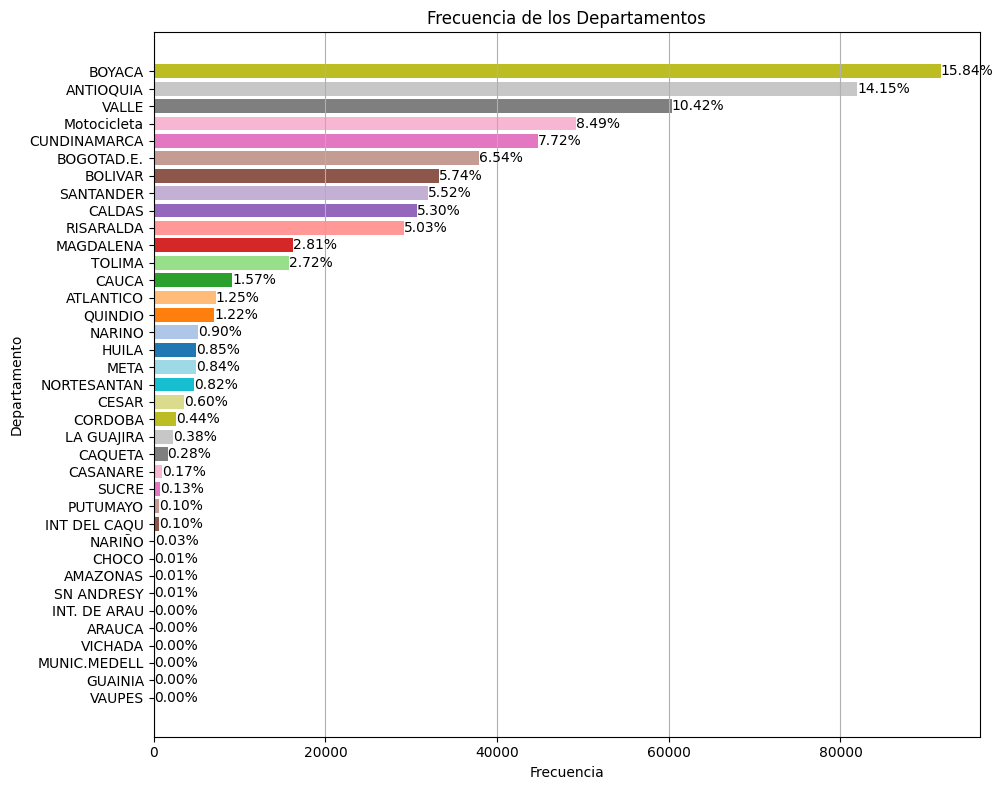

In [12]:
# Calcular la frecuencia de cada departamento
frecuencia_departamentos = df['departamento'].value_counts()

# Calcular el porcentaje de frecuencia de cada departamento
porcentaje_frecuencia = frecuencia_departamentos / len(df) * 100

# Ordenar los departamentos por frecuencia
frecuencia_departamentos = frecuencia_departamentos.sort_values(ascending=True)
porcentaje_frecuencia = porcentaje_frecuencia[frecuencia_departamentos.index]

# Colores para las barras
colors = plt.cm.tab20.colors[:len(frecuencia_departamentos)]

# Visualizar la distribución de la frecuencia de los departamentos
plt.figure(figsize=(10, 8))
barras = plt.barh(frecuencia_departamentos.index, frecuencia_departamentos, color=colors)
plt.title('Frecuencia de los Departamentos')
plt.xlabel('Frecuencia')
plt.ylabel('Departamento')
plt.grid(axis='x')
plt.tight_layout()

# Agregar etiquetas en porcentaje
for i, (barra, porcentaje) in enumerate(zip(barras, porcentaje_frecuencia)):
    plt.text(barra.get_width() + 0.5, barra.get_y() + barra.get_height()/2, f'{porcentaje:.2f}%', va='center')

plt.show()

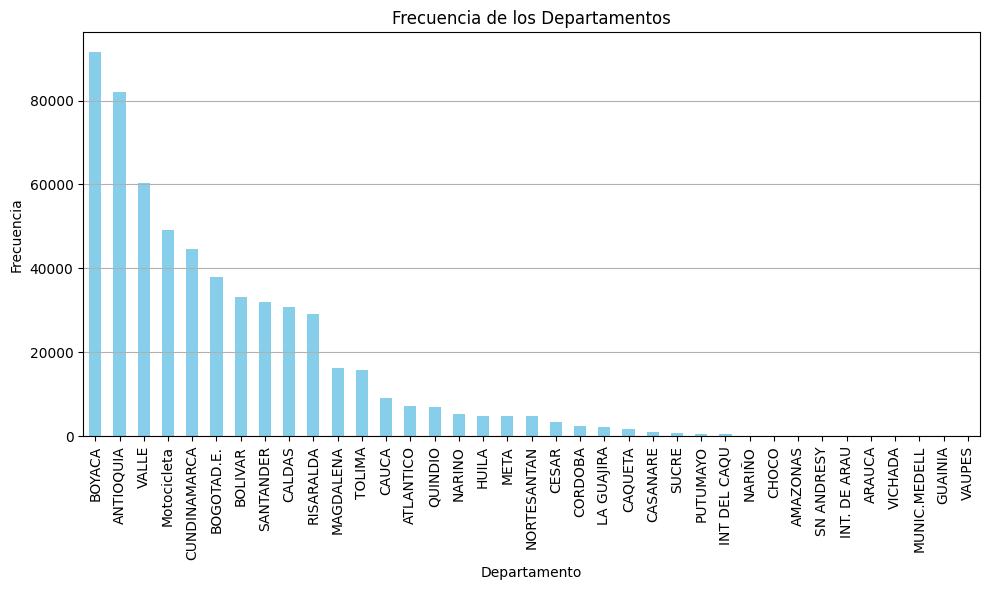

Cantidad total de departamentos únicos: 37

Estadísticas descriptivas de la frecuencia de los departamentos:
count       37.000000
mean     15645.594595
std      23735.341355
min          1.000000
25%        157.000000
50%       4719.000000
75%      29132.000000
max      91672.000000
Name: count, dtype: float64


In [13]:
# Calcular la cantidad total de departamentos únicos
total_departamentos = df['departamento'].nunique()

# Calcular la frecuencia de cada departamento
frecuencia_departamentos = df['departamento'].value_counts()

# Visualizar la distribución de la frecuencia de los departamentos
plt.figure(figsize=(10, 6))
frecuencia_departamentos.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de los Departamentos')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Mostrar la cantidad total de departamentos únicos
print("Cantidad total de departamentos únicos:", total_departamentos)

# Mostrar las estadísticas descriptivas de la frecuencia de los departamentos
print("\nEstadísticas descriptivas de la frecuencia de los departamentos:")
print(frecuencia_departamentos.describe())

Estadísticas descriptivas de la frecuencia de los departamentos:

Promedio (mean): La frecuencia promedio de los departamentos es de aproximadamente 15645.59.
Desviación estándar (std): La desviación estándar de la frecuencia de los departamentos es de aproximadamente 23735.34, lo que indica una dispersión considerable alrededor del promedio.
Mínimo (min): La frecuencia mínima de los departamentos es 1.
25º percentil (25%): El 25% de los departamentos tienen una frecuencia igual o inferior a 157.
Mediana (50%): La mediana de la frecuencia de los departamentos es de 4719, lo que indica que la mitad de los departamentos tienen una frecuencia igual o inferior a este valor.
75º percentil (75%): El 75% de los departamentos tienen una frecuencia igual o inferior a 29132.
Máximo (max): La frecuencia máxima de los departamentos es 91672.


In [14]:
import pandas as pd
import plotly.graph_objects as go
# Calcular la frecuencia de cada departamento
frecuencia_departamentos = df['departamento'].value_counts()

# Crear la tabla de frecuencia de los departamentos
tabla_frecuencia_departamentos = pd.DataFrame({'Departamento': frecuencia_departamentos.index, 'Frecuencia': frecuencia_departamentos.values})

# Crear la figura de la tabla utilizando Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=["Departamento", "Frecuencia"],
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=[tabla_frecuencia_departamentos['Departamento'],
                       tabla_frecuencia_departamentos['Frecuencia']],
               fill_color='lavender',
               align='center'))
])

# Establecer título de la tabla
fig.update_layout(title_text='Tabla de Frecuencia de Departamentos')

# Mostrar la tabla
fig.show()

In [15]:
# Calcular la frecuencia de cada departamento
frecuencia_departamentos = df['departamento'].value_counts()

# Crear la tabla de frecuencia de los departamentos
tabla_frecuencia_departamentos = pd.DataFrame({'Departamento': frecuencia_departamentos.index, 'Frecuencia': frecuencia_departamentos.values})
print(tabla_frecuencia_departamentos)

    Departamento  Frecuencia
0         BOYACA       91672
1      ANTIOQUIA       81924
2          VALLE       60323
3    Motocicleta       49140
4   CUNDINAMARCA       44717
5     BOGOTAD.E.       37832
6        BOLIVAR       33231
7      SANTANDER       31937
8         CALDAS       30696
9      RISARALDA       29132
10     MAGDALENA       16261
11        TOLIMA       15758
12         CAUCA        9107
13     ATLANTICO        7229
14       QUINDIO        7050
15        NARINO        5203
16         HUILA        4916
17          META        4875
18   NORTESANTAN        4719
19         CESAR        3482
20       CORDOBA        2547
21    LA GUAJIRA        2203
22       CAQUETA        1605
23      CASANARE         990
24         SUCRE         772
25      PUTUMAYO         604
26  INT DEL CAQU         582
27        NARIÑO         157
28         CHOCO          78
29      AMAZONAS          47
30    SN ANDRESY          43
31  INT. DE ARAU          25
32        ARAUCA          10
33       VICHA

In [16]:
# Calcular la cantidad total de ciudades únicas
total_ciudades = df['ciudad'].nunique()

# Calcular la frecuencia de cada ciudad
frecuencia_ciudades = df['ciudad'].value_counts()

# Calcular estadísticas descriptivas de la frecuencia de las ciudades
estadisticas_ciudades = frecuencia_ciudades.describe()

# Mostrar resultados
print("Cantidad total de ciudades únicas:", total_ciudades)
print("\nEstadísticas descriptivas de la frecuencia de las ciudades:")
print(estadisticas_ciudades)

Cantidad total de ciudades únicas: 191

Estadísticas descriptivas de la frecuencia de las ciudades:
count      191.000000
mean      3030.821990
std       7870.672664
min          1.000000
25%         73.000000
50%        544.000000
75%       2035.000000
max      57702.000000
Name: count, dtype: float64



Basándonos en el resultado proporcionado, podemos realizar el análisis descriptivo de la variable "ciudad" de la siguiente manera:

Cantidad total de ciudades únicas: Hay un total de 191 ciudades únicas en los datos proporcionados.

Estadísticas descriptivas de la frecuencia de las ciudades:

Promedio (mean): La frecuencia promedio de las ciudades es de aproximadamente 3030.82.
Desviación estándar (std): La desviación estándar de la frecuencia de las ciudades es de aproximadamente 7870.67, lo que indica una dispersión considerable alrededor del promedio.
Mínimo (min): La frecuencia mínima de las ciudades es 1.
25º percentil (25%): El 25% de las ciudades tienen una frecuencia igual o inferior a 73.
Mediana (50%): La mediana de la frecuencia de las ciudades es de 544, lo que indica que la mitad de las ciudades tienen una frecuencia igual o inferior a este valor.
75º percentil (75%): El 75% de las ciudades tienen una frecuencia igual o inferior a 2035.
Máximo (max): La frecuencia máxima de las ciudades es 57702.


In [17]:
import pandas as pd

# Estadísticas descriptivas de la frecuencia de las ciudades
estadisticas = {
    "count": 191,
    "mean": 2703.492147,
    "std": 7721.920542,
    "min": 1,
    "25%": 61,
    "50%": 327,
    "75%": 1704,
    "max": 57702
}

# Crear la tabla con tres columnas
tabla_explicativa = pd.DataFrame(columns=['Medida', 'Valor', 'Análisis'])

# Agregar las medidas estadísticas y sus análisis correspondientes
tabla_explicativa['Medida'] = estadisticas.keys()
tabla_explicativa['Valor'] = estadisticas.values()

# Análisis para cada medida
tabla_explicativa.loc[tabla_explicativa['Medida'] == 'count', 'Análisis'] = "El número total de ciudades únicas presentes en los datos."
tabla_explicativa.loc[tabla_explicativa['Medida'] == 'mean', 'Análisis'] = "La frecuencia promedio de las ciudades."
tabla_explicativa.loc[tabla_explicativa['Medida'] == 'std', 'Análisis'] = "La variabilidad promedio de las frecuencias de las ciudades con respecto a la media."
tabla_explicativa.loc[tabla_explicativa['Medida'] == 'min', 'Análisis'] = "La menor frecuencia entre todas las ciudades."
tabla_explicativa.loc[tabla_explicativa['Medida'] == '25%', 'Análisis'] = "El valor que divide al 25% de las ciudades con menor frecuencia del 75% restante."
tabla_explicativa.loc[tabla_explicativa['Medida'] == '50%', 'Análisis'] = "La frecuencia que ocupa la posición central cuando las ciudades se ordenan de menor a mayor frecuencia."
tabla_explicativa.loc[tabla_explicativa['Medida'] == '75%', 'Análisis'] = "El valor que divide al 75% de las ciudades con menor frecuencia del 25% restante."
tabla_explicativa.loc[tabla_explicativa['Medida'] == 'max', 'Análisis'] = "La mayor frecuencia entre todas las ciudades."

# Mostrar la tabla
print(tabla_explicativa)

  Medida         Valor                                           Análisis
0  count    191.000000  El número total de ciudades únicas presentes e...
1   mean   2703.492147            La frecuencia promedio de las ciudades.
2    std   7721.920542  La variabilidad promedio de las frecuencias de...
3    min      1.000000      La menor frecuencia entre todas las ciudades.
4    25%     61.000000  El valor que divide al 25% de las ciudades con...
5    50%    327.000000  La frecuencia que ocupa la posición central cu...
6    75%   1704.000000  El valor que divide al 75% de las ciudades con...
7    max  57702.000000      La mayor frecuencia entre todas las ciudades.


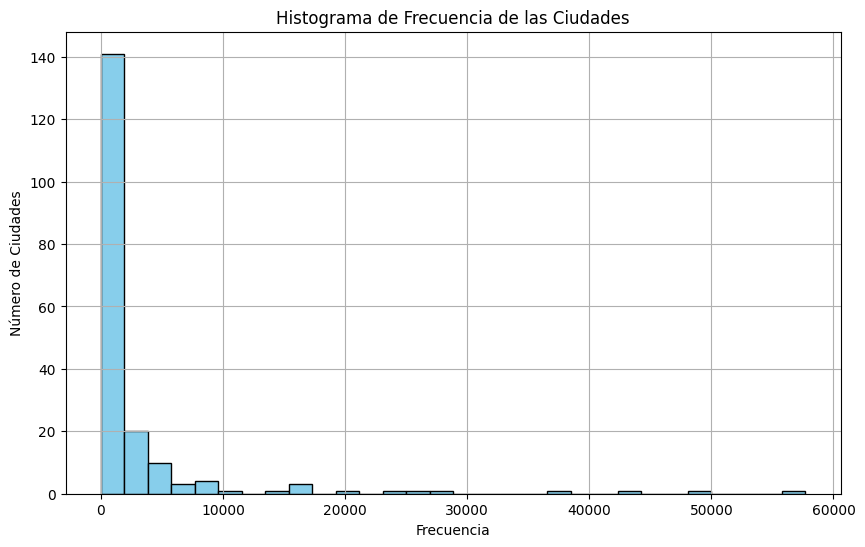

In [18]:
import pandas as pd
import matplotlib.pyplot as plt



# Calcular la frecuencia de cada ciudad
frecuencia_ciudades = df['ciudad'].value_counts()

# Crear el histograma de la frecuencia de las ciudades
plt.figure(figsize=(10, 6))
plt.hist(frecuencia_ciudades, bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Frecuencia de las Ciudades')
plt.xlabel('Frecuencia')
plt.ylabel('Número de Ciudades')
plt.grid(True)
plt.show()



El gráfico es un histograma que muestra la distribución de la frecuencia de las ciudades en los datos. En el eje horizontal (x), tenemos la frecuencia de las ciudades, que nos indica cuántas veces aparece cada ciudad en los datos. Mientras que en el eje vertical (y), tenemos el número de ciudades que tienen esa frecuencia.

Por ejemplo, si miramos el punto en el gráfico donde el eje x muestra el número 1000 y el eje y muestra el número 5, eso significa que hay alrededor de 5 ciudades en los datos que tienen una frecuencia de alrededor de 1000.

En resumen, el histograma nos ayuda a visualizar cómo se distribuyen las frecuencias de las ciudades en nuestros datos, mostrando qué tan comunes son ciertas frecuencias y cuántas ciudades tienen esas frecuencias en particular.

In [19]:
frecuencia_ciudades = df['ciudad'].value_counts()

# Calcular estadísticas descriptivas de la frecuencia de las ciudades
estadisticas_ciudades = frecuencia_ciudades.describe()

# Crear la tabla explicativa
tabla_explicativa = pd.DataFrame({
    'Estadísticas': ['Cantidad total de ciudades', 'Frecuencia media', 'Desviación estándar', 'Frecuencia mínima', 'Frecuencia máxima', '25° Percentil', 'Mediana', '75° Percentil'],
    'Valor': [estadisticas_ciudades['count'], estadisticas_ciudades['mean'], estadisticas_ciudades['std'], estadisticas_ciudades['min'], estadisticas_ciudades['max'], estadisticas_ciudades['25%'], estadisticas_ciudades['50%'], estadisticas_ciudades['75%']]
})

print(tabla_explicativa)

                 Estadísticas         Valor
0  Cantidad total de ciudades    191.000000
1            Frecuencia media   3030.821990
2         Desviación estándar   7870.672664
3           Frecuencia mínima      1.000000
4           Frecuencia máxima  57702.000000
5               25° Percentil     73.000000
6                     Mediana    544.000000
7               75° Percentil   2035.000000


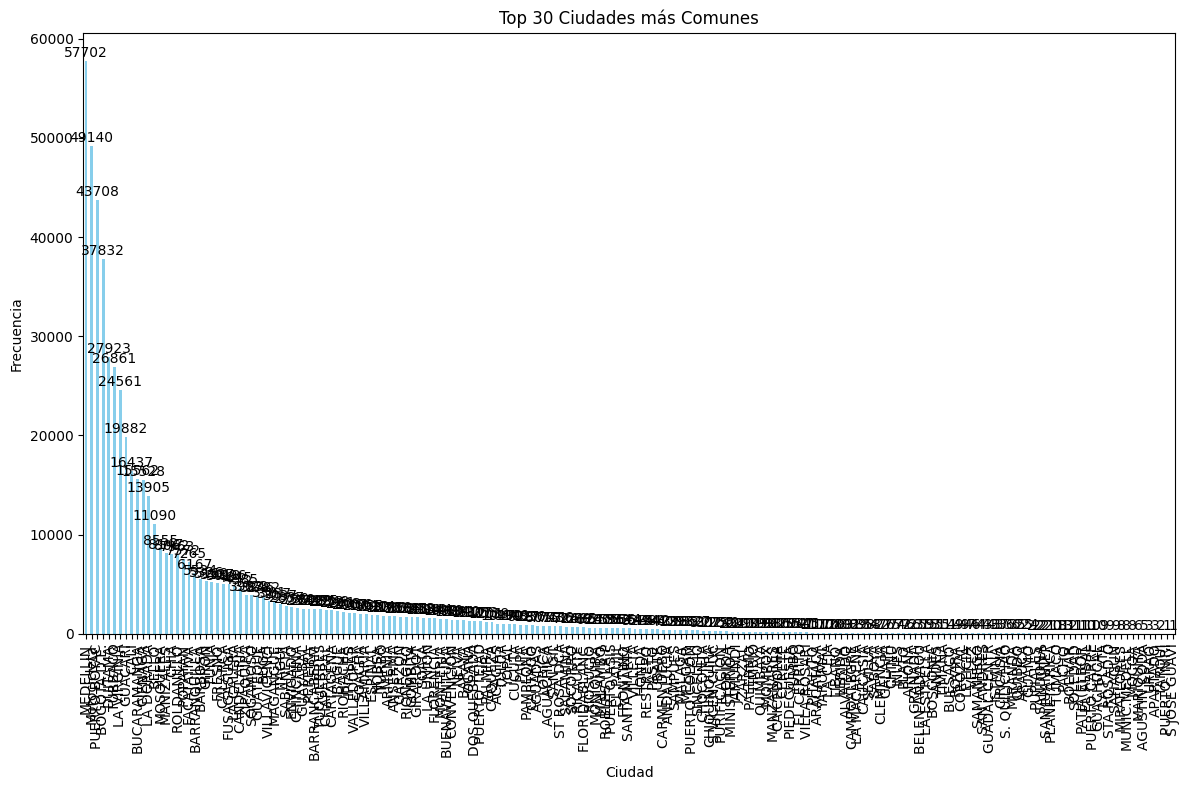

In [20]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
frecuencia_ciudades.plot(kind='bar', color='skyblue')

# Agregar etiquetas con la cantidad de veces que aparece cada ciudad
for i, count in enumerate(frecuencia_ciudades):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')

plt.title('Top 30 Ciudades más Comunes')
plt.xlabel('Ciudad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-21-74508c7ec915>:31: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



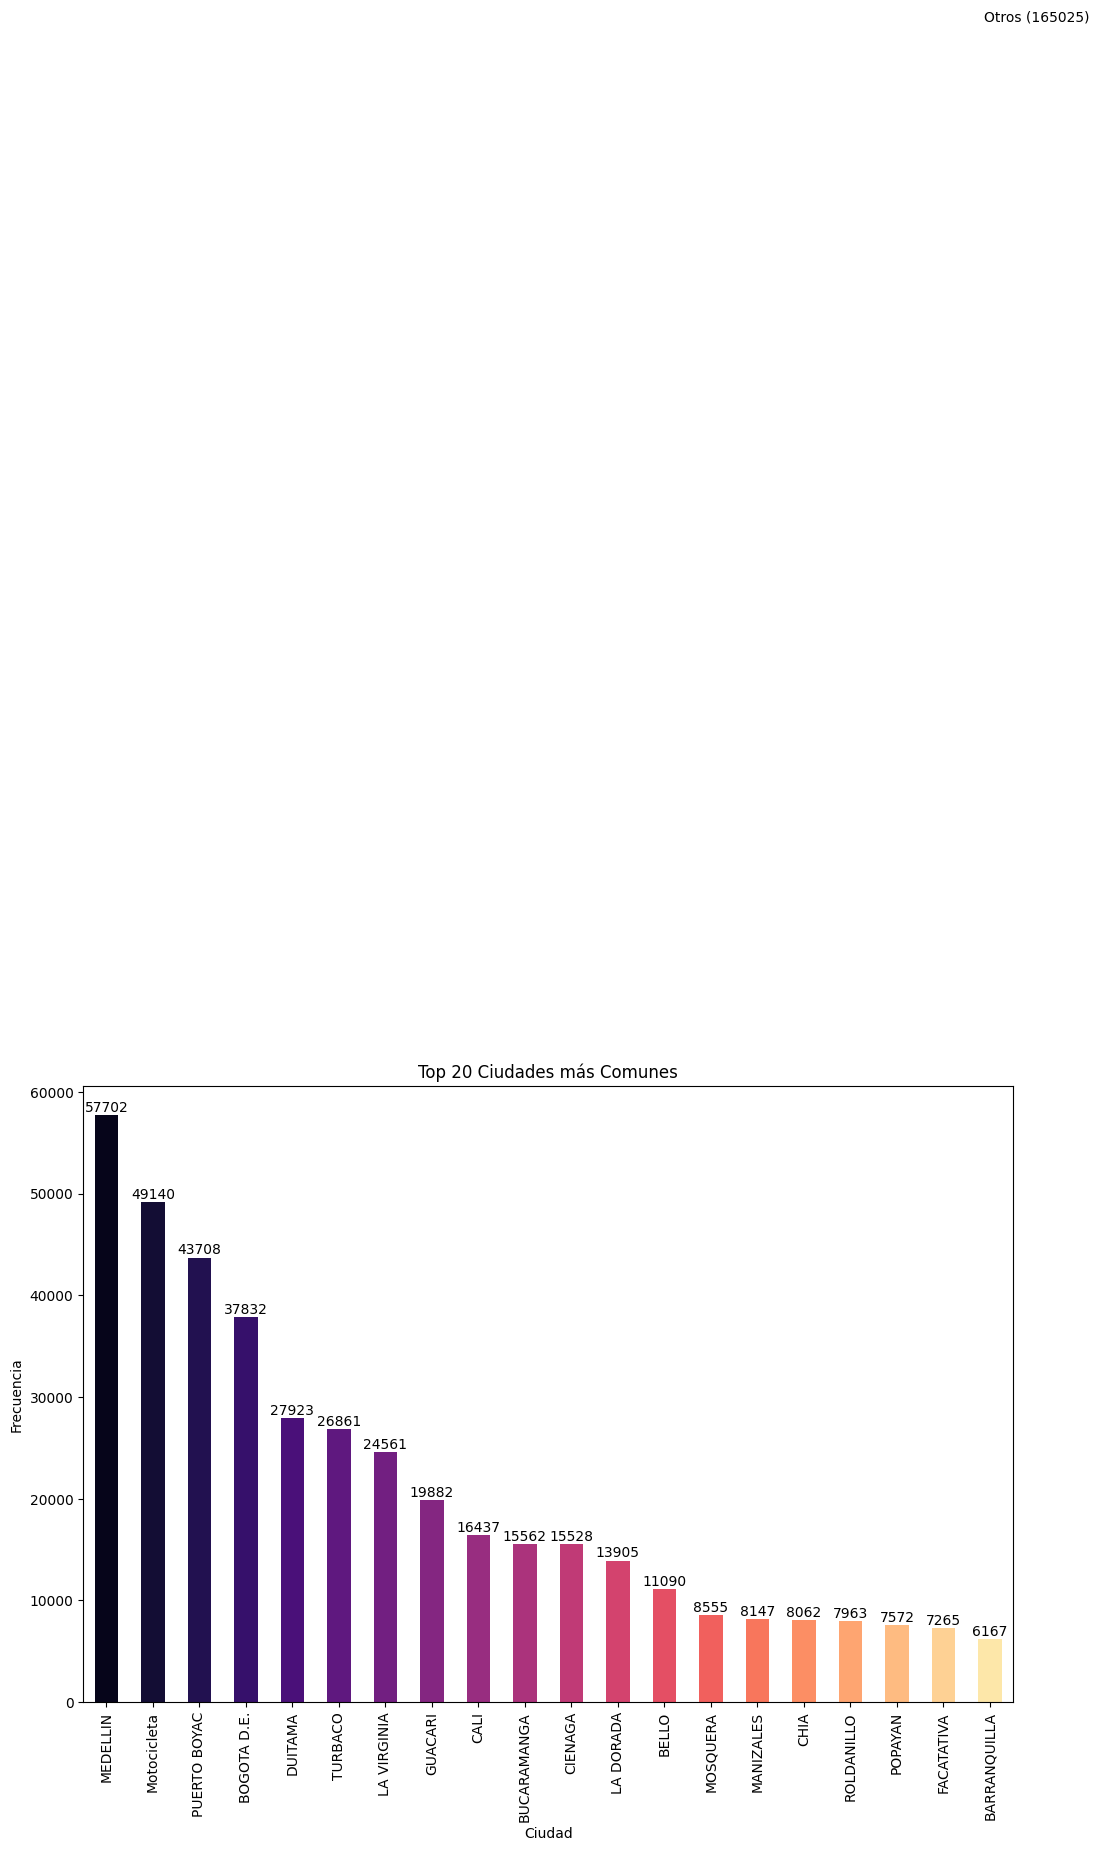

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calcular la frecuencia de cada ciudad
frecuencia_ciudades = df['ciudad'].value_counts()

# Seleccionar las primeras ciudades más comunes y agrupar el resto en "Otros"
top_ciudades = frecuencia_ciudades.head(20)
otros_ciudades = frecuencia_ciudades[20:].sum()

# Definir una paleta de colores personalizada
colores = sns.color_palette("magma", len(top_ciudades))

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
top_ciudades.plot(kind='bar', color=colores)

# Agregar etiquetas con la cantidad de veces que aparece cada ciudad
for i, count in enumerate(top_ciudades):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

# Agregar "Otros" como una categoría
plt.text(len(top_ciudades), otros_ciudades + 50, f'Otros ({otros_ciudades})', ha='center', va='bottom')

plt.title('Top 20 Ciudades más Comunes')
plt.xlabel('Ciudad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


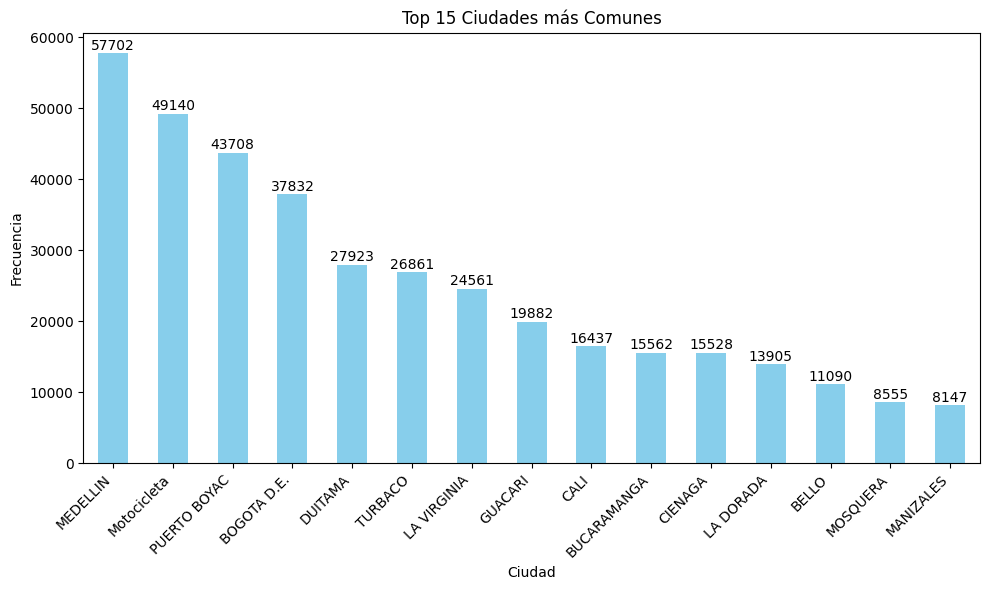

In [22]:
# Calcular la frecuencia de cada ciudad
frecuencia_ciudades = df['ciudad'].value_counts().head(15)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
frecuencia_ciudades.plot(kind='bar', color='skyblue')

# Agregar etiquetas con la cantidad de veces que aparece cada ciudad
for i, count in enumerate(frecuencia_ciudades):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')

plt.title('Top 15 Ciudades más Comunes')
plt.xlabel('Ciudad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

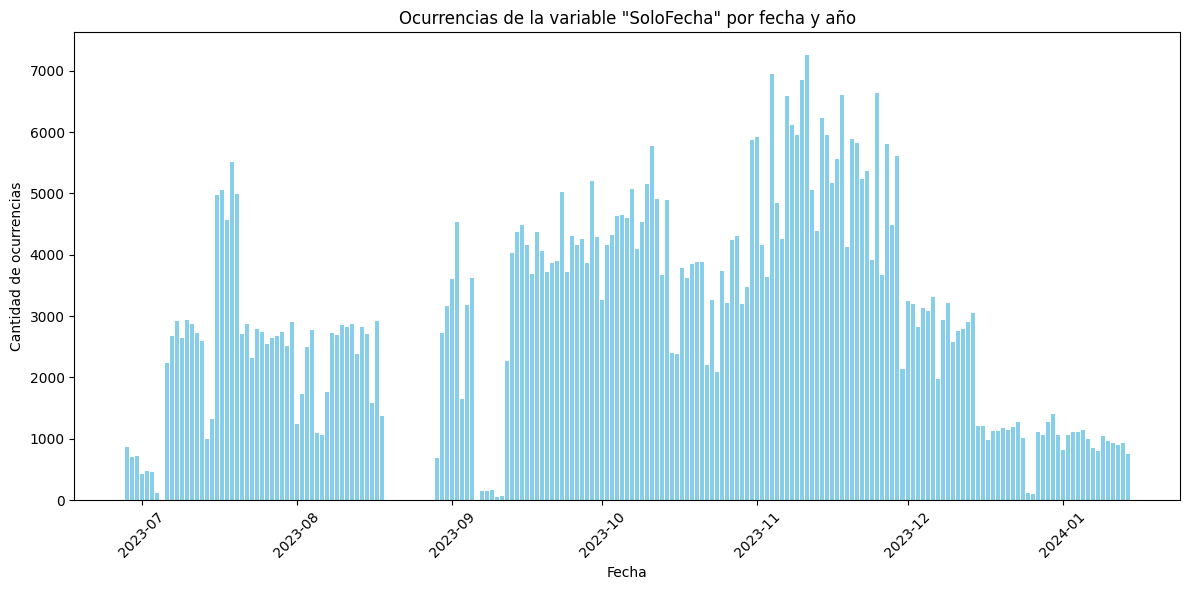

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna "SoloFecha" al formato de fecha
df['SoloFecha'] = pd.to_datetime(df['SoloFecha'], format='%d/%m/%Y')

# Crear una nueva columna para el año
df['Año'] = df['SoloFecha'].dt.year

# Agrupar los datos por fecha y año y contar la cantidad de ocurrencias en cada fecha
ocurrencias_por_fecha_y_año = df.groupby([df['SoloFecha'].dt.date, 'Año']).size()

# Convertir el resultado en un DataFrame
ocurrencias_por_fecha_y_año = ocurrencias_por_fecha_y_año.reset_index(name='Cantidad')

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(ocurrencias_por_fecha_y_año['SoloFecha'], ocurrencias_por_fecha_y_año['Cantidad'], color='skyblue')
plt.title('Ocurrencias de la variable "SoloFecha" por fecha y año')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de ocurrencias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



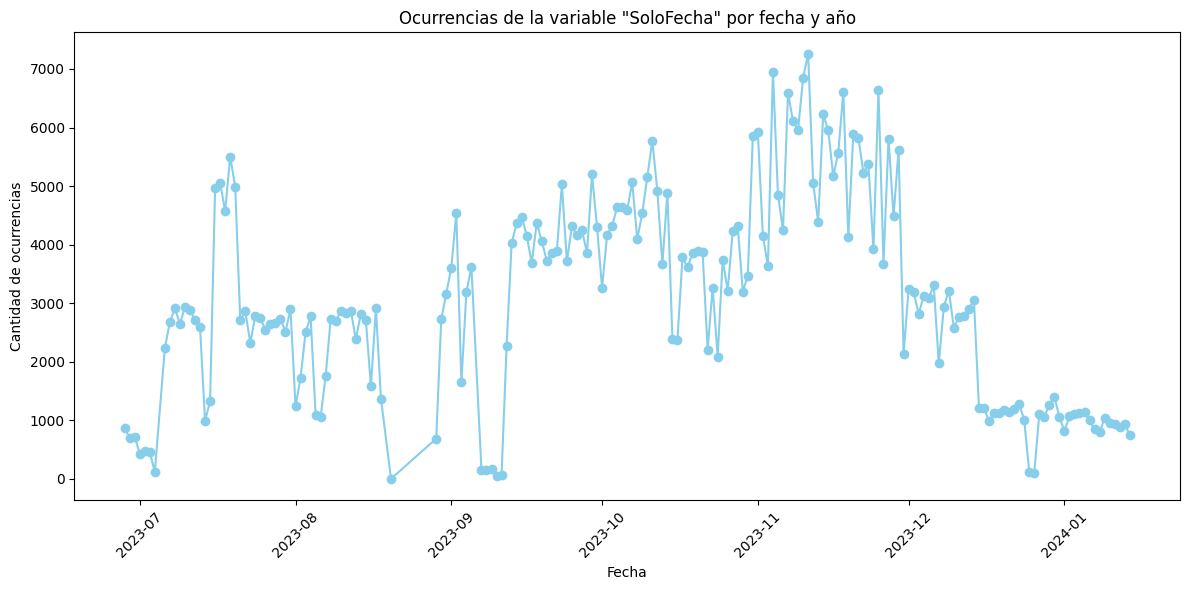

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna "SoloFecha" al formato de fecha
df['SoloFecha'] = pd.to_datetime(df['SoloFecha'], format='%d/%m/%Y')

# Crear una nueva columna para el año
df['Año'] = df['SoloFecha'].dt.year

# Agrupar los datos por fecha y año y contar la cantidad de ocurrencias en cada fecha
ocurrencias_por_fecha_y_año = df.groupby([df['SoloFecha'].dt.date, 'Año']).size()

# Convertir el resultado en un DataFrame
ocurrencias_por_fecha_y_año = ocurrencias_por_fecha_y_año.reset_index(name='Cantidad')

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(ocurrencias_por_fecha_y_año['SoloFecha'], ocurrencias_por_fecha_y_año['Cantidad'], marker='o', color='skyblue')
plt.title('Ocurrencias de la variable "SoloFecha" por fecha y año')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de ocurrencias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
# Convertir la columna "SoloFecha" al formato de fecha
df['SoloFecha'] = pd.to_datetime(df['SoloFecha'], format='%d/%m/%Y')

# Mostrar la distribución de las fechas
print("Distribución de las fechas:")
print(df['SoloFecha'].value_counts().sort_index())

# Identificar la cantidad de fechas únicas
cantidad_fechas_unicas = df['SoloFecha'].nunique()
print("\nCantidad de fechas únicas:", cantidad_fechas_unicas)

# Identificar la fecha mínima y máxima
fecha_minima = df['SoloFecha'].min()
fecha_maxima = df['SoloFecha'].max()
print("\nFecha mínima:", fecha_minima)
print("Fecha máxima:", fecha_maxima)

Distribución de las fechas:
SoloFecha
2023-06-28    866
2023-06-29    706
2023-06-30    721
2023-07-01    431
2023-07-02    472
             ... 
2024-01-10    958
2024-01-11    930
2024-01-12    891
2024-01-13    932
2024-01-14    751
Name: count, Length: 190, dtype: int64

Cantidad de fechas únicas: 190

Fecha mínima: 2023-06-28 00:00:00
Fecha máxima: 2024-01-14 00:00:00


In [26]:
# Convertir la columna "SoloFecha" al formato de fecha
df['SoloFecha'] = pd.to_datetime(df['SoloFecha'], format='%d/%m/%Y')

# Crear nuevas columnas para mes y año
df['Mes'] = df['SoloFecha'].dt.month
df['Año'] = df['SoloFecha'].dt.year

# Contar la cantidad de ocurrencias por mes y año
ocurrencias_por_mes_y_año = df.groupby(['Año', 'Mes']).size()

# Mostrar los resultados
print("Ocurrencias por mes y año:")
print(ocurrencias_por_mes_y_año)

Ocurrencias por mes y año:
Año   Mes
2023  6        2293
      7       79919
      8       46494
      9       94893
      10     123112
      11     160216
      12      58562
2024  1       13398
dtype: int64


In [27]:
# Convertir la columna "SoloHora" al formato de tiempo
df['SoloHora'] = pd.to_datetime(df['SoloHora'], format='%H:%M:%S').dt.time

# Mostrar la distribución de las horas
print("Distribución de las horas:")
print(df['SoloHora'].value_counts().sort_index())

# Identificar la cantidad de horas únicas
cantidad_horas_unicas = df['SoloHora'].nunique()
print("\nCantidad de horas únicas:", cantidad_horas_unicas)

# Identificar la hora mínima y máxima
hora_minima = df['SoloHora'].min()
hora_maxima = df['SoloHora'].max()
print("\nHora mínima:", hora_minima)
print("Hora máxima:", hora_maxima)

Distribución de las horas:
SoloHora
00:00:00    3212
00:01:00      15
00:02:00      16
00:03:00      16
00:04:00       3
            ... 
23:55:00      10
23:56:00       9
23:57:00      15
23:58:00      11
23:59:00      20
Name: count, Length: 1439, dtype: int64

Cantidad de horas únicas: 1439

Hora mínima: 00:00:00
Hora máxima: 23:59:00


In [28]:
# Convertir la columna "SoloHora" al formato de tiempo
df['SoloHora'] = pd.to_datetime(df['SoloHora'], format='%H:%M:%S')

# Redondear la hora al intervalo más cercano de horas cerradas
df['HoraRedondeada'] = df['SoloHora'].dt.floor('H')

# Mostrar la distribución de las horas redondeadas
print("Distribución de las horas redondeadas:")
print(df['HoraRedondeada'].value_counts().sort_index())

# Identificar la cantidad de intervalos de horas cerradas únicas
cantidad_intervalos_unicos = df['HoraRedondeada'].nunique()
print("\nCantidad de intervalos de horas cerradas únicas:", cantidad_intervalos_unicos)

# Identificar el intervalo de hora mínima y máxima
hora_minima = df['HoraRedondeada'].min()
hora_maxima = df['HoraRedondeada'].max()
print("\nIntervalo de hora mínima:", hora_minima)
print("Intervalo de hora máxima:", hora_maxima)

Distribución de las horas redondeadas:
HoraRedondeada
1900-01-01 00:00:00     4000
1900-01-01 01:00:00      577
1900-01-01 02:00:00      451
1900-01-01 03:00:00      380
1900-01-01 04:00:00      509
1900-01-01 05:00:00     3625
1900-01-01 06:00:00    26941
1900-01-01 07:00:00    43847
1900-01-01 08:00:00    47648
1900-01-01 09:00:00    47432
1900-01-01 10:00:00    49969
1900-01-01 11:00:00    49887
1900-01-01 12:00:00    54076
1900-01-01 13:00:00    48687
1900-01-01 14:00:00    52853
1900-01-01 15:00:00    50895
1900-01-01 16:00:00    45317
1900-01-01 17:00:00    28316
1900-01-01 18:00:00     7231
1900-01-01 19:00:00     4271
1900-01-01 20:00:00     3258
1900-01-01 21:00:00     3942
1900-01-01 22:00:00     3570
1900-01-01 23:00:00     1205
Name: count, dtype: int64

Cantidad de intervalos de horas cerradas únicas: 24

Intervalo de hora mínima: 1900-01-01 00:00:00
Intervalo de hora máxima: 1900-01-01 23:00:00


In [29]:
# Convertir la columna "SoloHora" al formato de tiempo
df['SoloHora'] = pd.to_datetime(df['SoloHora'], format='%H:%M:%S')

# Redondear la hora al intervalo más cercano de horas cerradas
df['HoraRedondeada'] = df['SoloHora'].dt.floor('H')

# Mostrar la distribución de las horas redondeadas
print("Distribución de las horas redondeadas:")
print(df['HoraRedondeada'].value_counts().sort_index())

# Identificar la cantidad de intervalos de horas cerradas únicas
cantidad_intervalos_unicos = df['HoraRedondeada'].nunique()
print("\nCantidad de intervalos de horas cerradas únicas:", cantidad_intervalos_unicos)

# Identificar el intervalo de hora mínima y máxima
hora_minima = df['HoraRedondeada'].min()
hora_maxima = df['HoraRedondeada'].max()
print("\nIntervalo de hora mínima:", hora_minima)
print("Intervalo de hora máxima:", hora_maxima)

Distribución de las horas redondeadas:
HoraRedondeada
1900-01-01 00:00:00     4000
1900-01-01 01:00:00      577
1900-01-01 02:00:00      451
1900-01-01 03:00:00      380
1900-01-01 04:00:00      509
1900-01-01 05:00:00     3625
1900-01-01 06:00:00    26941
1900-01-01 07:00:00    43847
1900-01-01 08:00:00    47648
1900-01-01 09:00:00    47432
1900-01-01 10:00:00    49969
1900-01-01 11:00:00    49887
1900-01-01 12:00:00    54076
1900-01-01 13:00:00    48687
1900-01-01 14:00:00    52853
1900-01-01 15:00:00    50895
1900-01-01 16:00:00    45317
1900-01-01 17:00:00    28316
1900-01-01 18:00:00     7231
1900-01-01 19:00:00     4271
1900-01-01 20:00:00     3258
1900-01-01 21:00:00     3942
1900-01-01 22:00:00     3570
1900-01-01 23:00:00     1205
Name: count, dtype: int64

Cantidad de intervalos de horas cerradas únicas: 24

Intervalo de hora mínima: 1900-01-01 00:00:00
Intervalo de hora máxima: 1900-01-01 23:00:00


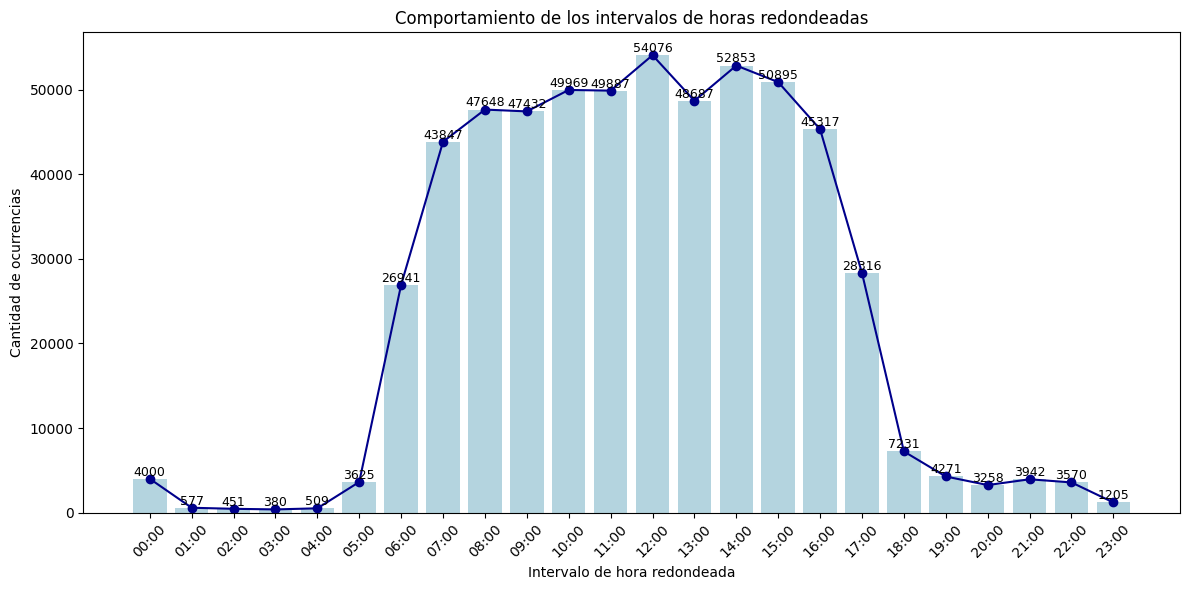

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna "SoloHora" al formato de tiempo
df['SoloHora'] = pd.to_datetime(df['SoloHora'], format='%H:%M:%S')

# Redondear la hora al intervalo más cercano de horas cerradas
df['HoraRedondeada'] = df['SoloHora'].dt.floor('H')

# Calcular la cantidad de ocurrencias de cada intervalo de hora redondeada
ocurrencias_por_intervalo = df['HoraRedondeada'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=ocurrencias_por_intervalo.index.strftime('%H:%M'), y=ocurrencias_por_intervalo.values, color='lightblue')

# Línea de tendencia
plt.plot(ocurrencias_por_intervalo.index.strftime('%H:%M'), ocurrencias_por_intervalo.values, color='darkblue', marker='o', linestyle='-')

# Etiquetas con cantidades
for i, valor in enumerate(ocurrencias_por_intervalo.values):
    plt.text(i, valor + 10, str(valor), ha='center', va='bottom', fontsize=9)

# Etiquetas y título
plt.title('Comportamiento de los intervalos de horas redondeadas')
plt.xlabel('Intervalo de hora redondeada')
plt.ylabel('Cantidad de ocurrencias')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


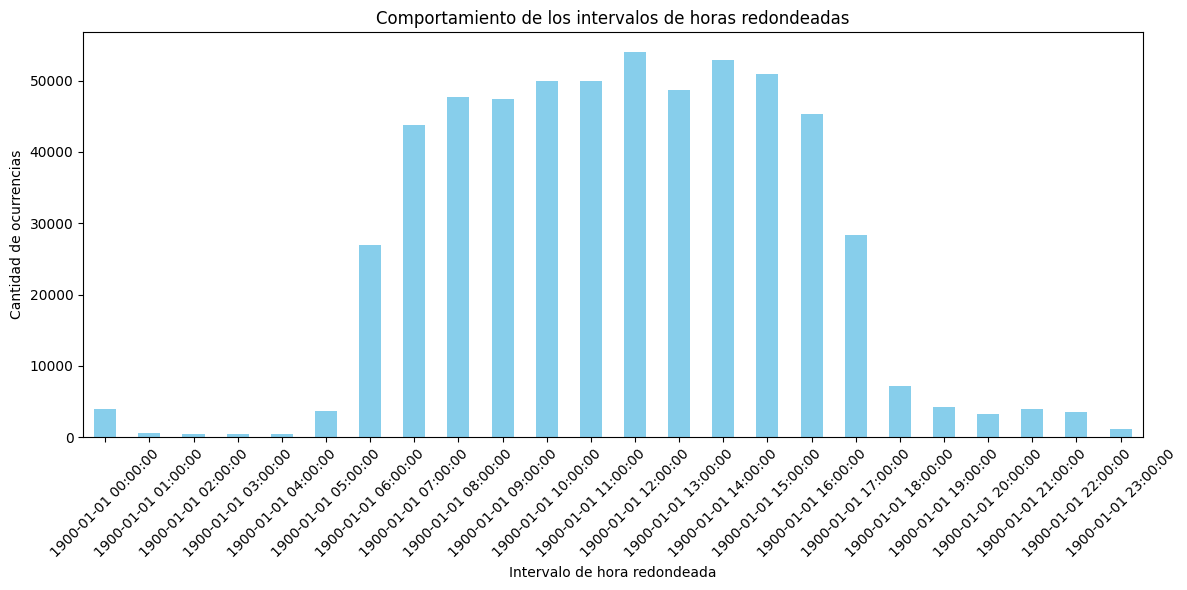

In [31]:
# Convertir la columna "SoloHora" al formato de tiempo
df['SoloHora'] = pd.to_datetime(df['SoloHora'], format='%H:%M:%S')

# Redondear la hora al intervalo más cercano de horas cerradas
df['HoraRedondeada'] = df['SoloHora'].dt.floor('H')

# Calcular la cantidad de ocurrencias de cada intervalo de hora redondeada
ocurrencias_por_intervalo = df['HoraRedondeada'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ocurrencias_por_intervalo.plot(kind='bar', color='skyblue')

# Etiquetas y título
plt.title('Comportamiento de los intervalos de horas redondeadas')
plt.xlabel('Intervalo de hora redondeada')
plt.ylabel('Cantidad de ocurrencias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


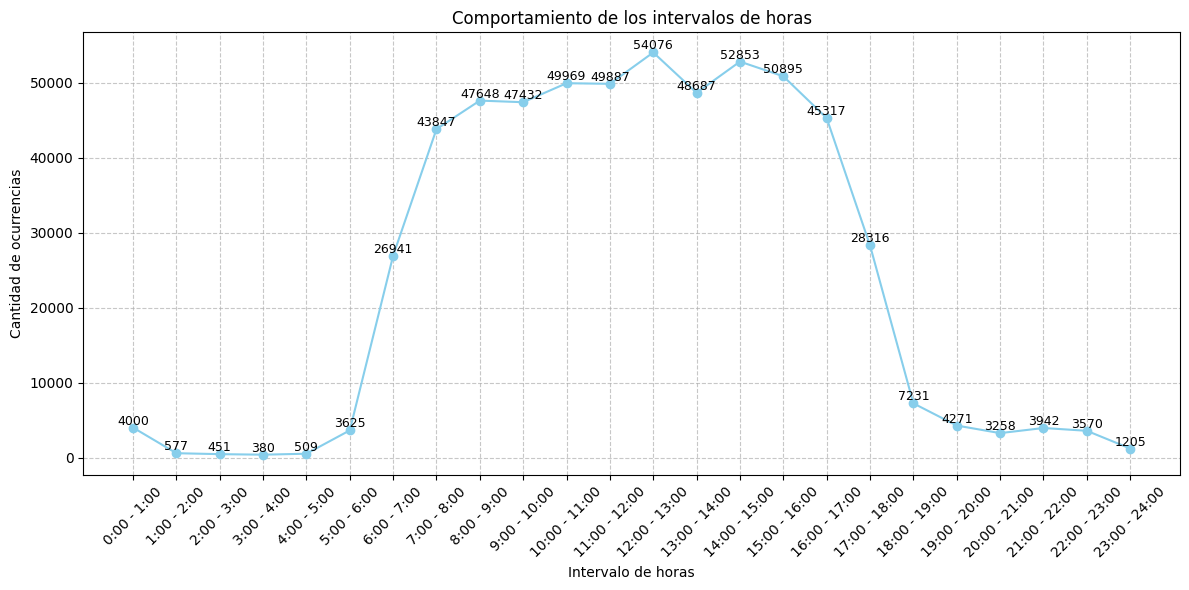

Análisis exploratorio de los intervalos de horas:
0:00 - 1:00       4000
1:00 - 2:00        577
2:00 - 3:00        451
3:00 - 4:00        380
4:00 - 5:00        509
5:00 - 6:00       3625
6:00 - 7:00      26941
7:00 - 8:00      43847
8:00 - 9:00      47648
9:00 - 10:00     47432
10:00 - 11:00    49969
11:00 - 12:00    49887
12:00 - 13:00    54076
13:00 - 14:00    48687
14:00 - 15:00    52853
15:00 - 16:00    50895
16:00 - 17:00    45317
17:00 - 18:00    28316
18:00 - 19:00     7231
19:00 - 20:00     4271
20:00 - 21:00     3258
21:00 - 22:00     3942
22:00 - 23:00     3570
23:00 - 24:00     1205
Name: count, dtype: int64


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
# Supongamos que aquí se carga el DataFrame desde un archivo CSV

# Convertir la columna "SoloHora" al formato de tiempo
df['SoloHora'] = pd.to_datetime(df['SoloHora'], format='%H:%M:%S')

# Crear una nueva columna que represente el intervalo de horas redondeadas
df['IntervaloHora'] = df['SoloHora'].dt.hour

# Contabilizar las ocurrencias en cada intervalo
ocurrencias_por_intervalo = df['IntervaloHora'].value_counts().sort_index()

# Crear el rango de intervalos de 0 a 24
rango_intervalos = range(0, 24)

# Asegurar que todos los intervalos estén presentes, incluso si no hay ocurrencias
ocurrencias_por_intervalo = ocurrencias_por_intervalo.reindex(rango_intervalos, fill_value=0)

# Convertir los nombres de los intervalos a formatos de hora legibles
nombres_intervalos = [f"{i}:00 - {i+1}:00" for i in range(0, 24)]
ocurrencias_por_intervalo.index = nombres_intervalos

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(ocurrencias_por_intervalo.index, ocurrencias_por_intervalo.values, marker='o', color='skyblue')

# Agregar etiquetas a los puntos de datos
for x, y in zip(ocurrencias_por_intervalo.index, ocurrencias_por_intervalo.values):
    plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=9)

# Etiquetas y título
plt.title('Comportamiento de los intervalos de horas')
plt.xlabel('Intervalo de horas')
plt.ylabel('Cantidad de ocurrencias')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)  # Agregar una cuadrícula punteada
plt.tight_layout()
plt.show()

# Mostrar el análisis exploratorio
print("Análisis exploratorio de los intervalos de horas:")
print(ocurrencias_por_intervalo)


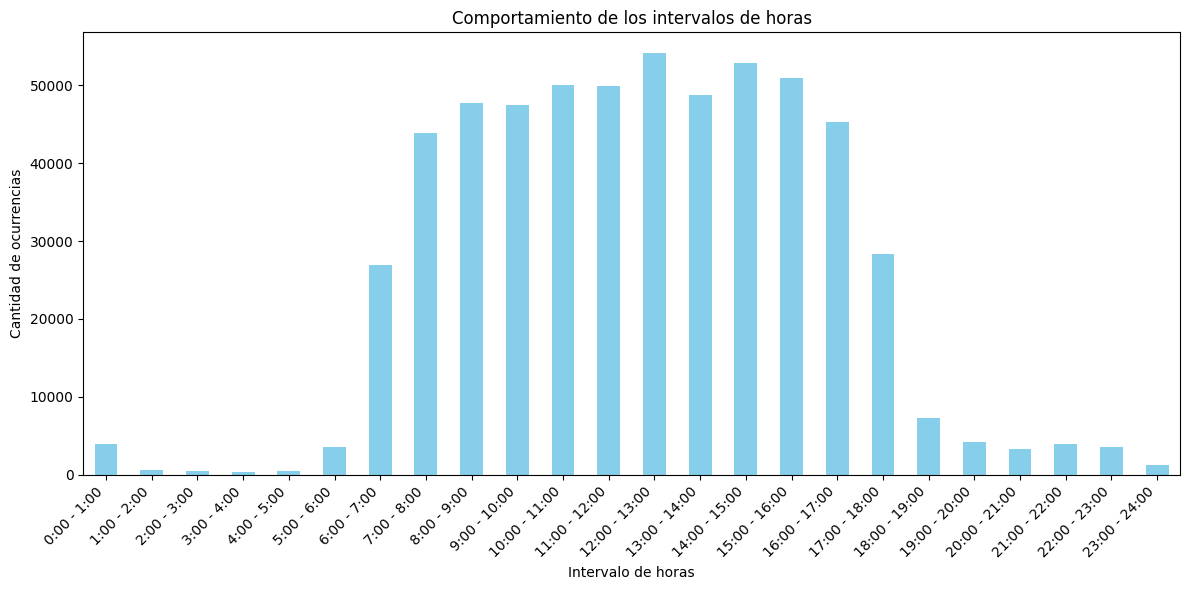

Análisis exploratorio de los intervalos de horas:
0:00 - 1:00       4000
1:00 - 2:00        577
2:00 - 3:00        451
3:00 - 4:00        380
4:00 - 5:00        509
5:00 - 6:00       3625
6:00 - 7:00      26941
7:00 - 8:00      43847
8:00 - 9:00      47648
9:00 - 10:00     47432
10:00 - 11:00    49969
11:00 - 12:00    49887
12:00 - 13:00    54076
13:00 - 14:00    48687
14:00 - 15:00    52853
15:00 - 16:00    50895
16:00 - 17:00    45317
17:00 - 18:00    28316
18:00 - 19:00     7231
19:00 - 20:00     4271
20:00 - 21:00     3258
21:00 - 22:00     3942
22:00 - 23:00     3570
23:00 - 24:00     1205
Name: count, dtype: int64


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV


# Convertir la columna "SoloHora" al formato de tiempo
df['SoloHora'] = pd.to_datetime(df['SoloHora'], format='%H:%M:%S')

# Crear una nueva columna que represente el intervalo de horas redondeadas
df['IntervaloHora'] = df['SoloHora'].dt.hour

# Contabilizar las ocurrencias en cada intervalo
ocurrencias_por_intervalo = df['IntervaloHora'].value_counts().sort_index()

# Crear el rango de intervalos de 0 a 24
rango_intervalos = range(0, 24)

# Asegurar que todos los intervalos estén presentes, incluso si no hay ocurrencias
ocurrencias_por_intervalo = ocurrencias_por_intervalo.reindex(rango_intervalos, fill_value=0)

# Convertir los nombres de los intervalos a formatos de hora legibles
nombres_intervalos = [f"{i}:00 - {i+1}:00" for i in range(0, 24)]
ocurrencias_por_intervalo.index = nombres_intervalos

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ocurrencias_por_intervalo.plot(kind='bar', color='skyblue')

# Etiquetas y título
plt.title('Comportamiento de los intervalos de horas')
plt.xlabel('Intervalo de horas')
plt.ylabel('Cantidad de ocurrencias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Mostrar el análisis exploratorio
print("Análisis exploratorio de los intervalos de horas:")
print(ocurrencias_por_intervalo)


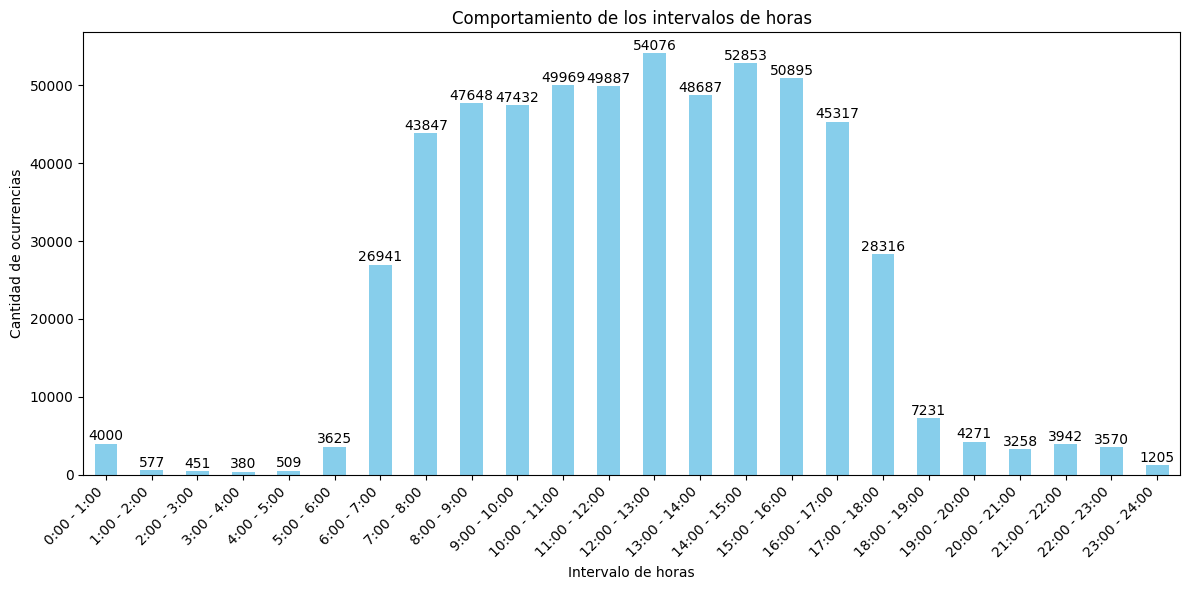

Análisis exploratorio de los intervalos de horas:
0:00 - 1:00       4000
1:00 - 2:00        577
2:00 - 3:00        451
3:00 - 4:00        380
4:00 - 5:00        509
5:00 - 6:00       3625
6:00 - 7:00      26941
7:00 - 8:00      43847
8:00 - 9:00      47648
9:00 - 10:00     47432
10:00 - 11:00    49969
11:00 - 12:00    49887
12:00 - 13:00    54076
13:00 - 14:00    48687
14:00 - 15:00    52853
15:00 - 16:00    50895
16:00 - 17:00    45317
17:00 - 18:00    28316
18:00 - 19:00     7231
19:00 - 20:00     4271
20:00 - 21:00     3258
21:00 - 22:00     3942
22:00 - 23:00     3570
23:00 - 24:00     1205
Name: count, dtype: int64


In [34]:
import pandas as pd
import matplotlib.pyplot as plt



# Convertir la columna "SoloHora" al formato de tiempo
df['SoloHora'] = pd.to_datetime(df['SoloHora'], format='%H:%M:%S')

# Crear una nueva columna que represente el intervalo de horas redondeadas
df['IntervaloHora'] = df['SoloHora'].dt.hour

# Contabilizar las ocurrencias en cada intervalo
ocurrencias_por_intervalo = df['IntervaloHora'].value_counts().sort_index()

# Crear el rango de intervalos de 0 a 24
rango_intervalos = range(0, 24)

# Asegurar que todos los intervalos estén presentes, incluso si no hay ocurrencias
ocurrencias_por_intervalo = ocurrencias_por_intervalo.reindex(rango_intervalos, fill_value=0)

# Convertir los nombres de los intervalos a formatos de hora legibles
nombres_intervalos = [f"{i}:00 - {i+1}:00" for i in range(0, 24)]
ocurrencias_por_intervalo.index = nombres_intervalos

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ocurrencias_por_intervalo.plot(kind='bar', color='skyblue')

# Etiquetas y título
plt.title('Comportamiento de los intervalos de horas')
plt.xlabel('Intervalo de horas')
plt.ylabel('Cantidad de ocurrencias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Agregar etiquetas a las barras
for i, valor in enumerate(ocurrencias_por_intervalo):
    plt.text(i, valor + 50, str(valor), ha='center', va='bottom')

plt.show()

# Mostrar el análisis exploratorio
print("Análisis exploratorio de los intervalos de horas:")
print(ocurrencias_por_intervalo)


In [35]:

# Convertir la columna "SoloHora" al formato de tiempo
df['SoloHora'] = pd.to_datetime(df['SoloHora'], format='%H:%M:%S')

# Crear una nueva columna que represente el intervalo de horas redondeadas
df['IntervaloHora'] = df['SoloHora'].dt.hour

# Contabilizar las ocurrencias en cada intervalo
ocurrencias_por_intervalo = df['IntervaloHora'].value_counts().sort_index()

# Crear el rango de intervalos de 0 a 24
rango_intervalos = range(0, 24)

# Asegurar que todos los intervalos estén presentes, incluso si no hay ocurrencias
ocurrencias_por_intervalo = ocurrencias_por_intervalo.reindex(rango_intervalos, fill_value=0)

# Convertir los nombres de los intervalos a formatos de hora legibles
nombres_intervalos = [f"{i}:00 - {i+1}:00" for i in range(0, 24)]
ocurrencias_por_intervalo.index = nombres_intervalos

# Calcular medidas de tendencia central
media = ocurrencias_por_intervalo.mean()
mediana = ocurrencias_por_intervalo.median()
moda = ocurrencias_por_intervalo.idxmax()  # idxmax devuelve la etiqueta del índice donde ocurre el valor máximo

# Mostrar el análisis exploratorio
print("Análisis exploratorio de los intervalos de horas:")
print(ocurrencias_por_intervalo)
print("\nMedidas de tendencia central:")
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Análisis exploratorio de los intervalos de horas:
0:00 - 1:00       4000
1:00 - 2:00        577
2:00 - 3:00        451
3:00 - 4:00        380
4:00 - 5:00        509
5:00 - 6:00       3625
6:00 - 7:00      26941
7:00 - 8:00      43847
8:00 - 9:00      47648
9:00 - 10:00     47432
10:00 - 11:00    49969
11:00 - 12:00    49887
12:00 - 13:00    54076
13:00 - 14:00    48687
14:00 - 15:00    52853
15:00 - 16:00    50895
16:00 - 17:00    45317
17:00 - 18:00    28316
18:00 - 19:00     7231
19:00 - 20:00     4271
20:00 - 21:00     3258
21:00 - 22:00     3942
22:00 - 23:00     3570
23:00 - 24:00     1205
Name: count, dtype: int64

Medidas de tendencia central:
Media: 24120.291666666668
Mediana: 17086.0
Moda: 12:00 - 13:00


Análisis exploratorio de la variable 'servicio':
servicio
PARTICULAR     344330
PUBLICO        180177
Motocicleta     49140
OFICIAL          5240
Name: count, dtype: int64

Medidas de tendencia central:
Media: 144721.75
Mediana: 114658.5
Moda: PARTICULAR

Medidas de dispersión:
Desviación estándar: 152415.6135229699
Rango: 339090


<ipython-input-36-a70f4cca40d1>:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




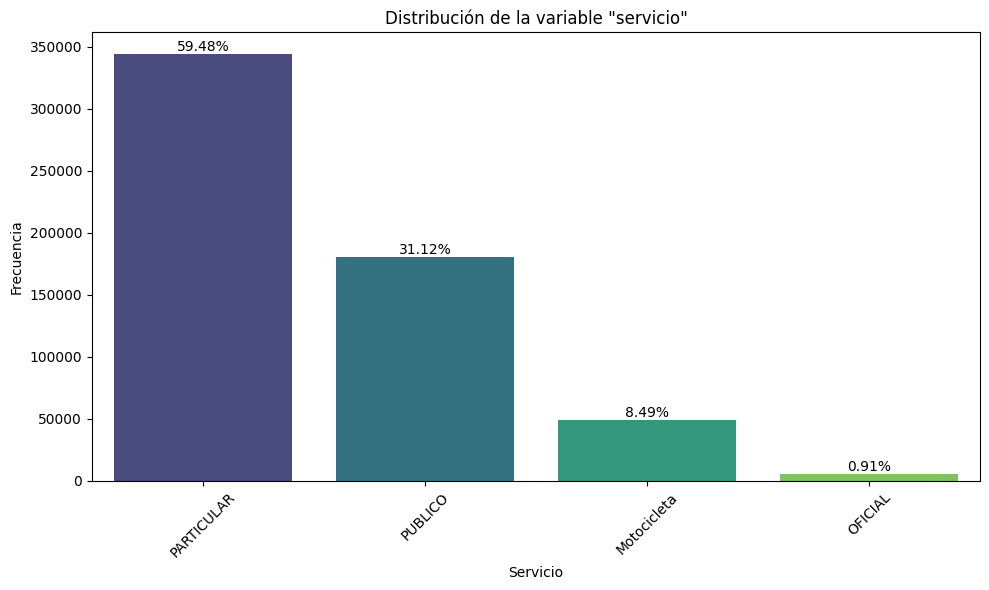

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analizar la variable "servicio"
servicio_counts = df['servicio'].value_counts()

# Calcular el porcentaje de cada valor con respecto al total de la frecuencia
porcentaje_servicio = (servicio_counts / servicio_counts.sum()) * 100

# Calcular medidas de tendencia central
media = servicio_counts.mean()
mediana = servicio_counts.median()
moda = servicio_counts.idxmax()

# Calcular medidas de dispersión
desviacion_estandar = servicio_counts.std()
rango = servicio_counts.max() - servicio_counts.min()

# Mostrar el análisis exploratorio
print("Análisis exploratorio de la variable 'servicio':")
print(servicio_counts)
print("\nMedidas de tendencia central:")
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
print("\nMedidas de dispersión:")
print(f"Desviación estándar: {desviacion_estandar}")
print(f"Rango: {rango}")

# Crear un gráfico de barras para visualizar la distribución de los valores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=servicio_counts.index, y=servicio_counts.values, palette='viridis')

# Agregar etiquetas en porcentaje al gráfico
total = len(df)  # Total de observaciones
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height / total:.2%}', ha='center', va='bottom')

plt.title('Distribución de la variable "servicio"')
plt.xlabel('Servicio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Análisis exploratorio de la variable 'servicio':
servicio
PARTICULAR     344330
PUBLICO        180177
Motocicleta     49140
OFICIAL          5240
Name: count, dtype: int64

Medidas de tendencia central:
Media: 144721.75
Mediana: 114658.5
Moda: PARTICULAR

Medidas de dispersión:
Desviación estándar: 152415.6135229699
Rango: 339090


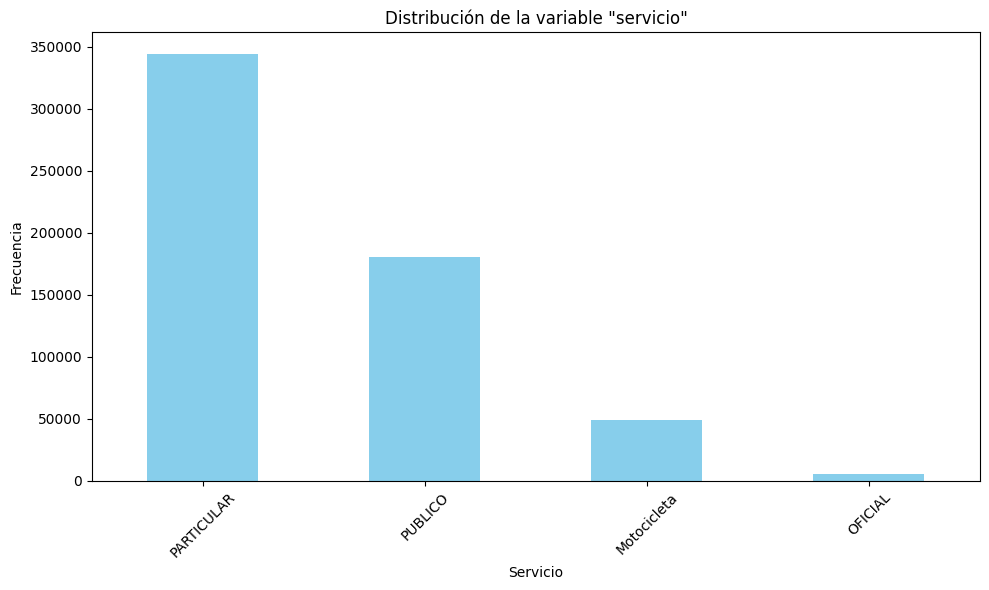

In [37]:
# Analizar la variable "servicio"
servicio_counts = df['servicio'].value_counts()

# Calcular medidas de tendencia central
media = df['servicio'].value_counts().mean()
mediana = df['servicio'].value_counts().median()
moda = df['servicio'].value_counts().idxmax()

# Calcular medidas de dispersión
desviacion_estandar = df['servicio'].value_counts().std()
rango = df['servicio'].value_counts().max() - df['servicio'].value_counts().min()

# Mostrar el análisis exploratorio
print("Análisis exploratorio de la variable 'servicio':")
print(servicio_counts)
print("\nMedidas de tendencia central:")
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
print("\nMedidas de dispersión:")
print(f"Desviación estándar: {desviacion_estandar}")
print(f"Rango: {rango}")

# Crear un gráfico de barras para visualizar la distribución de los valores
plt.figure(figsize=(10, 6))
servicio_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de la variable "servicio"')
plt.xlabel('Servicio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Análisis exploratorio de la variable 'Día de la Semana':
DiaSemana
sábado       90253
miércoles    89500
jueves       85539
martes       85350
viernes      82299
lunes        77566
domingo      68380
Name: count, dtype: int64

Medidas de tendencia central:
Media: 82698.14285714286
Mediana: 85350.0
Moda: sábado

Medidas de dispersión:
Desviación estándar: 7637.09546508731
Rango: 21873


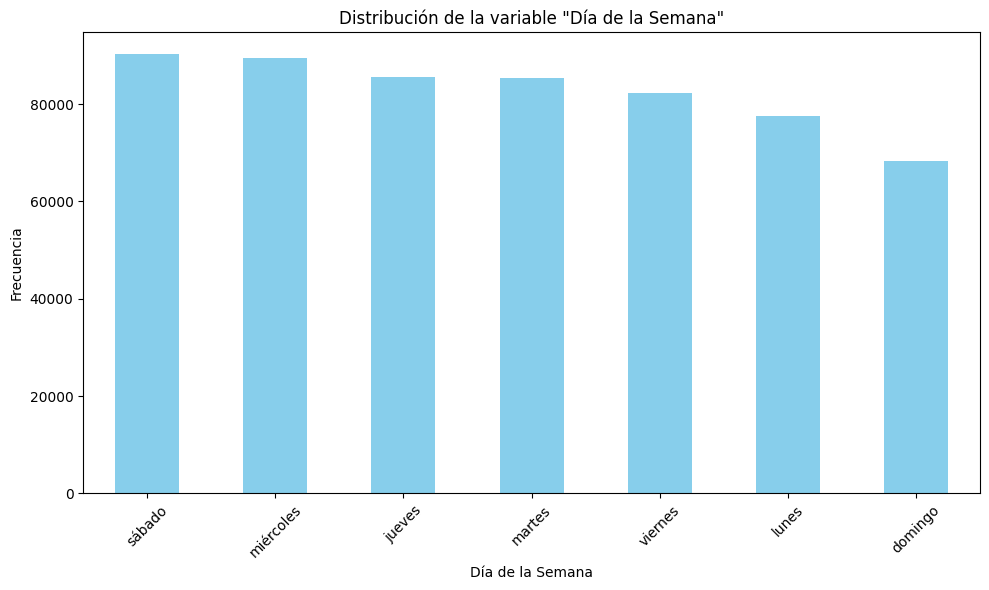

In [38]:
# Analizar la variable "Día de la Semana"
dia_semana_counts = df['DiaSemana'].value_counts()

# Calcular medidas de tendencia central
media = dia_semana_counts.mean()
mediana = dia_semana_counts.median()
moda = dia_semana_counts.idxmax()

# Calcular medidas de dispersión
desviacion_estandar = dia_semana_counts.std()
rango = dia_semana_counts.max() - dia_semana_counts.min()

# Mostrar el análisis exploratorio
print("Análisis exploratorio de la variable 'Día de la Semana':")
print(dia_semana_counts)
print("\nMedidas de tendencia central:")
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
print("\nMedidas de dispersión:")
print(f"Desviación estándar: {desviacion_estandar}")
print(f"Rango: {rango}")

# Crear un gráfico de barras para visualizar la distribución de los valores
plt.figure(figsize=(10, 6))
dia_semana_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de la variable "Día de la Semana"')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Análisis exploratorio de la variable 'Día de la Semana':
DiaSemana
domingo      68380
lunes        77566
martes       85350
miércoles    89500
jueves       85539
viernes      82299
sábado       90253
Name: count, dtype: int64

Medidas de tendencia central:
Media: 82698.14285714286
Mediana: 85350.0
Moda: sábado

Medidas de dispersión:
Desviación estándar: 7637.095465087309
Rango: 21873


<ipython-input-49-e9942d37c70a>:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




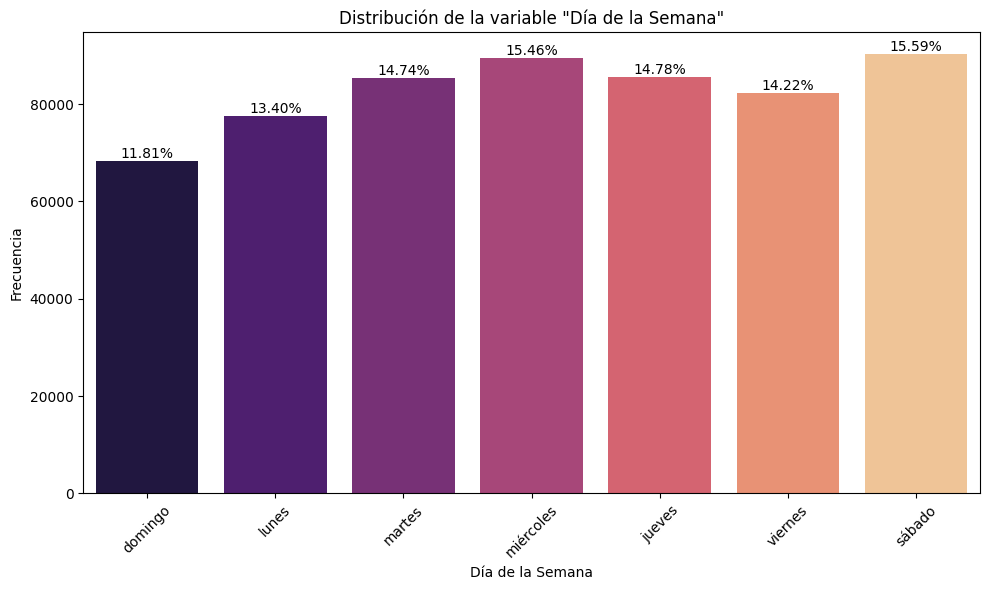

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analizar la variable "Día de la Semana"

dia_semana_counts = df['DiaSemana'].value_counts()


# Especificar el orden correcto de los días de la semana
orden_dias = ['domingo','lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado' ]
dia_semana_counts = dia_semana_counts.reindex(orden_dias)


# Calcular el porcentaje de cada valor con respecto al total de la frecuencia
porcentaje_dia_semana = (dia_semana_counts / dia_semana_counts.sum()) * 100

# Calcular medidas de tendencia central
media = dia_semana_counts.mean()
mediana = dia_semana_counts.median()
moda = dia_semana_counts.idxmax()

# Calcular medidas de dispersión
desviacion_estandar = dia_semana_counts.std()
rango = dia_semana_counts.max() - dia_semana_counts.min()

# Mostrar el análisis exploratorio
print("Análisis exploratorio de la variable 'Día de la Semana':")
print(dia_semana_counts)
print("\nMedidas de tendencia central:")
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
print("\nMedidas de dispersión:")
print(f"Desviación estándar: {desviacion_estandar}")
print(f"Rango: {rango}")

# Crear un gráfico de barras para visualizar la distribución de los valores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=dia_semana_counts.index, y=dia_semana_counts.values, palette='magma')

# Agregar etiquetas en porcentaje al gráfico
total = len(df)  # Total de observaciones
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height / total:.2%}', ha='center', va='bottom')

plt.title('Distribución de la variable "Día de la Semana"')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice



Análisis exploratorio de la variable 'Día de la Semana':
DiaSemana
Lunes       NaN
Martes      NaN
Miércoles   NaN
Jueves      NaN
Viernes     NaN
Sábado      NaN
Domingo     NaN
Name: count, dtype: float64

Medidas de tendencia central:
Media: nan
Mediana: nan
Moda: nan

Medidas de dispersión:
Desviación estándar: nan
Rango: nan


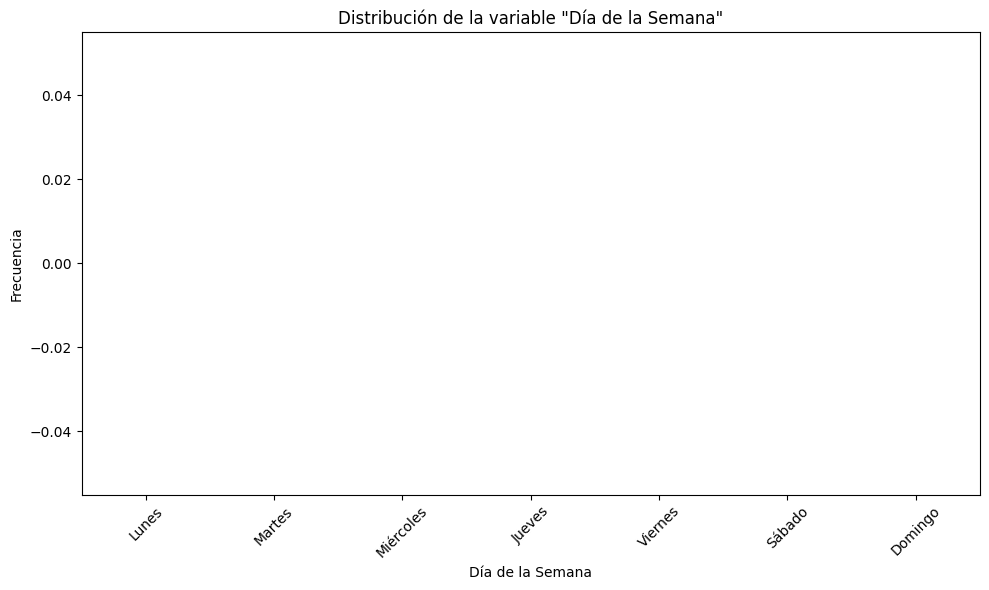

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que df es tu DataFrame
# Ordenar los días de la semana
order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
dia_semana_counts = df['DiaSemana'].value_counts().reindex(order)

# Calcular medidas de tendencia central
media = dia_semana_counts.mean()
mediana = dia_semana_counts.median()
moda = dia_semana_counts.idxmax()

# Calcular medidas de dispersión
desviacion_estandar = dia_semana_counts.std()
rango = dia_semana_counts.max() - dia_semana_counts.min()

# Mostrar el análisis exploratorio
print("Análisis exploratorio de la variable 'Día de la Semana':")
print(dia_semana_counts)
print("\nMedidas de tendencia central:")
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
print("\nMedidas de dispersión:")
print(f"Desviación estándar: {desviacion_estandar}")
print(f"Rango: {rango}")

# Crear un gráfico de barras para visualizar la distribución de los valores
plt.figure(figsize=(10, 6))
dia_semana_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de la variable "Día de la Semana"')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [41]:
import pandas as pd

# Supongamos que df es tu DataFrame con los datos

# Lista de variables a considerar (excluyendo 'Placa')
variables = ['departamento', 'ciudad', 'servicio', 'SoloFecha', 'SoloHora', 'DiaSemana', 'Mes', 'Año', 'HoraRedondeada', 'IntervaloHora']

# Crear un DataFrame vacío para almacenar los indicadores
indicadores = pd.DataFrame()

# Iterar sobre las combinaciones de variables
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        # Seleccionar las dos variables de la combinación
        var1 = variables[i]
        var2 = variables[j]

        # Calcular estadísticas descriptivas para la combinación de variables
        descripcion = df.groupby([var1, var2]).size().describe()

        # Agregar las estadísticas descriptivas al DataFrame de indicadores
        indicadores[f'{var1}_vs_{var2}'] = descripcion

# Mostrar los indicadores
print(indicadores)

       departamento_vs_ciudad  departamento_vs_servicio  \
count              191.000000                 95.000000   
mean              3030.821990               6093.547368   
std               7870.672664              13541.940077   
min                  1.000000                  1.000000   
25%                 73.000000                 31.000000   
50%                544.000000                394.000000   
75%               2035.000000               3339.000000   
max              57702.000000              65505.000000   

       departamento_vs_SoloFecha  departamento_vs_SoloHora  \
count                5121.000000              25466.000000   
mean                  113.041789                 22.731760   
std                   174.458737                 33.456523   
min                     1.000000                  1.000000   
25%                     8.000000                  2.000000   
50%                    33.000000                  7.000000   
75%                   153.000000  

In [42]:
!pip install plotly


In [43]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para excluir la categoría 'Motocicleta' de la columna 'departamento'
df_filtered = df[df['departamento'] != 'Motocicleta']

# Cargar el GeoDataFrame de Colombia


colombia_geojson = "https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/1d0e9cb4a9d861baa152b4a13c4e214c49cdcf1b/Colombia.geo.json"
gdf_colombia = gpd.read_file(colombia_geojson)
# Unir el GeoDataFrame con el DataFrame filtrado
gdf_merged = gdf_colombia.merge(df_filtered, left_on='departamento', right_on='departamento', how='left')

# Visualizar el mapa
fig, ax = plt.subplots(figsize=(10, 10))
gdf_merged.plot(column='servicio', ax=ax, legend=True, cmap='viridis', edgecolor='black')
plt.title('Servicios por Departamento en Colombia (excluyendo Motocicleta)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


HTTPError: HTTP Error 404: Not Found

In [ ]:
import pandas as pd
import plotly.express as px
import json

# Filtrar el DataFrame para excluir la categoría 'Motocicleta' de la columna 'departamento'
df_filtered = df[df['departamento'] != 'Motocicleta']

# Ruta al archivo GeoJSON de Colombia en tu sistema local
colombia_geojson = 'colombia-municipios.json'

# Cargar el GeoDataFrame de Colombia desde el archivo local
with open(colombia_geojson, 'r') as f:
    colombia_geojson_data = json.load(f)

# Crear un gráfico de cloropletas con plotly express
fig = px.choropleth(df_filtered, geojson=colombia_geojson_data, locations='departamento', color='servicio',
                    color_continuous_scale="Viridis",
                    scope="south america",
                    labels={'servicio':'Servicio'},
                    title='Servicios por Departamento en Colombia (excluyendo Motocicleta)')
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")

# Mostrar el gráfico
fig.show()



In [ ]:
import pandas as pd
import plotly.express as px
import json

# Filtrar el DataFrame para excluir la categoría 'Motocicleta' de la columna 'departamento'
df_filtered = df[df['departamento'] != 'Motocicleta']

# Ruta al archivo GeoJSON de Colombia en tu sistema local
colombia_geojson = 'colombia.geo.json'

# Cargar el GeoDataFrame de Colombia desde el archivo local
with open(colombia_geojson, 'r') as f:
    colombia_geojson_data = json.load(f)

# Crear un gráfico de cloropletas con plotly express
fig = px.choropleth(df_filtered, geojson=colombia_geojson_data, locations='departamento', color='servicio',
                    color_continuous_scale="Viridis",
                    scope="south america",
                    labels={'servicio':'Servicio'},
                    title='Servicios por Departamento en Colombia (excluyendo Motocicleta)')
fig.update_layout(width=1200)

# Mostrar el gráfico
fig.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df es tu DataFrame con los datos

# Calcular la frecuencia de cada combinación de departamento y servicio
frecuencia_departamento_servicio = df.groupby(['departamento', 'servicio']).size()

# Convertir la serie en un DataFrame para facilitar el trabajo
frecuencia_departamento_servicio = frecuencia_departamento_servicio.reset_index(name='frecuencia')

# Graficar la frecuencia de cada combinación de departamento y servicio
plt.figure(figsize=(12, 6))
sns.barplot(data=frecuencia_departamento_servicio, x='departamento', y='frecuencia', hue='servicio', palette='viridis')
plt.title('Frecuencia de combinaciones de Departamento y Servicio')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Servicio')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df es tu DataFrame con los datos

# Calcular la frecuencia de cada combinación de departamento y servicio
frecuencia_departamento_servicio = df.groupby(['departamento', 'servicio']).size()

# Convertir la serie en un DataFrame para facilitar el trabajo
frecuencia_departamento_servicio = frecuencia_departamento_servicio.reset_index(name='frecuencia')

# Graficar la frecuencia de cada combinación de departamento y servicio
plt.figure(figsize=(12, 6))
sns.lineplot(data=frecuencia_departamento_servicio, x='departamento', y='frecuencia', hue='servicio', palette='colorblind')
plt.title('Frecuencia de combinaciones de Departamento y Servicio')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Servicio', bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar etiquetas con las cantidades
for i in range(len(frecuencia_departamento_servicio)):
    departamento = frecuencia_departamento_servicio.loc[i, 'departamento']
    servicio = frecuencia_departamento_servicio.loc[i, 'servicio']
    cantidad = frecuencia_departamento_servicio.loc[i, 'frecuencia']
    plt.annotate(str(cantidad), (i, cantidad), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()
